## 1. KNN

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

fruits_df = pd.read_table('fruit_data_with_colors.txt')

X = fruits_df[['mass', 'width', 'height', 'color_score']]
y = fruits_df['fruit_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print('acc：', acc)

acc： 0.5833333333333334


## 2. linear regresion

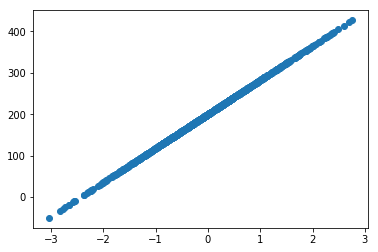

In [21]:

import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
%matplotlib inline

plt.figure()

X_R1, y_R1 = make_regression(n_samples = 1000, n_features=1,
                            n_informative=1, bias = 200, random_state=0)

plt.scatter(X_R1, y_R1)
plt.show()

In [22]:
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1,
                                                   random_state = 0)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

print('model coeff(w): {}'.format(linreg.coef_))
print('model constant(b): {:.3f}'.format(linreg.intercept_))
print('train R-squared score: {:.3f}'.format(linreg.score(X_train, y_train)))
print('test R-squared score: {:.3f}'.format(linreg.score(X_test, y_test)))

model coeff(w): [82.19039084]
model constant(b): 200.000
train R-squared score: 1.000
test R-squared score: 1.000


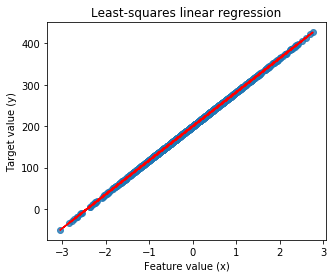

In [23]:

plt.figure(figsize=(5,4))
plt.scatter(X_R1, y_R1, alpha=0.8)
plt.plot(X_R1, linreg.coef_ * X_R1 + linreg.intercept_, 'r-')
plt.title('Least-squares linear regression')
plt.xlabel('Feature value (x)')
plt.ylabel('Target value (y)')
plt.show()

## 3. logistic regression

C=0.1，acc：0.583


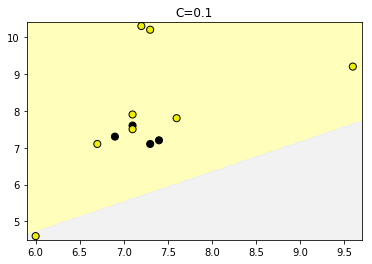

C=10，acc：0.500


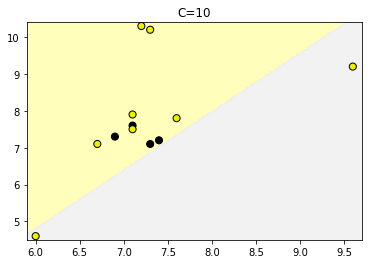

C=100，acc：0.583


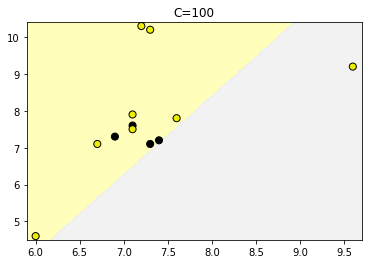

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from ml_visualization import plot_class_regions_for_classifier


fruits_df = pd.read_table('fruit_data_with_colors.txt')

X = fruits_df[['width', 'height']]
y = fruits_df['fruit_label'].copy()


y[y != 1] = 0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)


c_values = [0.1, 10, 100]

for c_value in c_values:

    lr_model = LogisticRegression(C=c_value)

    lr_model.fit(X_train, y_train)

    y_pred = lr_model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    print('C={}，acc：{:.3f}'.format(c_value, acc))
    
    plot_class_regions_for_classifier(lr_model, X_test.values, y_test.values, title='C={}'.format(c_value))

## 4. SVM

C=0.0001，acc：0.667


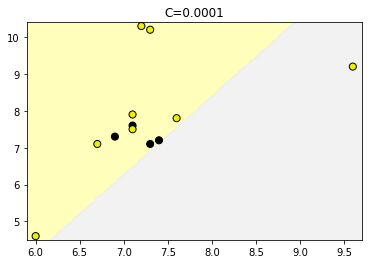

C=10，acc：0.750


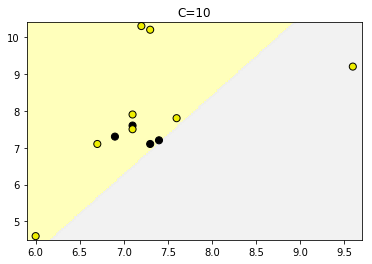

C=10000，acc：0.500


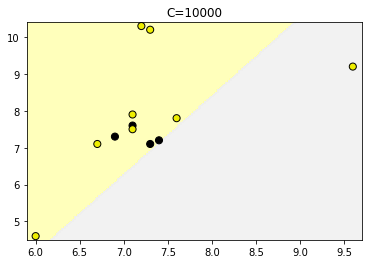

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC


fruits_df = pd.read_table('fruit_data_with_colors.txt')

X = fruits_df[['width', 'height']]
y = fruits_df['fruit_label'].copy()

y[y != 1] = 0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

c_values = [0.0001, 10, 10000]

for c_value in c_values:

    svm_model = SVC(C=c_value)


    svm_model.fit(X_train, y_train)

    y_pred = svm_model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    print('C={}，acc：{:.3f}'.format(c_value, acc))
    
    plot_class_regions_for_classifier(lr_model, X_test.values, y_test.values, title='C={}'.format(c_value))

## 5. Decission tree

In [29]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

max_depth_values = [2, 3, 4]

for max_depth_val in max_depth_values:
    dt_model = DecisionTreeClassifier(max_depth=max_depth_val)
    dt_model.fit(X_train, y_train)
    
    print('max_depth=', max_depth_val)
    print('train acc: {:.3f}'.format(dt_model.score(X_train, y_train)))
    print('test acc: {:.3f}\n'.format(dt_model.score(X_test, y_test)))

max_depth= 2
train acc: 0.964
test acc: 0.895

max_depth= 3
train acc: 0.982
test acc: 0.974

max_depth= 4
train acc: 1.000
test acc: 0.974

